## Handling outliers with IQR and median values

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [131]:
df = pd.read_csv('hepatitis.data', header=None)
df.tail(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2
154,1,43,1,2,2,1,2,2,2,2,1,1,1,2,1.20,100,19,3.1,42,2


In [132]:
df.columns = ["class", "age", "sex", "steroid", "antivirals","fatigue", "malaise", 
                 "anorexia", "liver_big","liver_firm", "spleen_palpable", "spiders", "ascites", 
                "varices", "bilirubin", "alk_phosphate", "sgot", 
               "albumin","protime", "histology"]
df.tail()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2
154,1,43,1,2,2,1,2,2,2,2,1,1,1,2,1.20,100,19,3.1,42,2


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   class            155 non-null    int64 
 1   age              155 non-null    int64 
 2   sex              155 non-null    int64 
 3   steroid          155 non-null    object
 4   antivirals       155 non-null    int64 
 5   fatigue          155 non-null    object
 6   malaise          155 non-null    object
 7   anorexia         155 non-null    object
 8   liver_big        155 non-null    object
 9   liver_firm       155 non-null    object
 10  spleen_palpable  155 non-null    object
 11  spiders          155 non-null    object
 12  ascites          155 non-null    object
 13  varices          155 non-null    object
 14  bilirubin        155 non-null    object
 15  alk_phosphate    155 non-null    object
 16  sgot             155 non-null    object
 17  albumin          155 non-null    ob

## Find Duplicates

In [134]:
df.duplicated().sum()

0

In [135]:
df.shape

(155, 20)

## Data Validation and Data Type Conversion

In [136]:
df= df.replace('?', np.NaN)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   class            155 non-null    int64 
 1   age              155 non-null    int64 
 2   sex              155 non-null    int64 
 3   steroid          154 non-null    object
 4   antivirals       155 non-null    int64 
 5   fatigue          154 non-null    object
 6   malaise          154 non-null    object
 7   anorexia         154 non-null    object
 8   liver_big        145 non-null    object
 9   liver_firm       144 non-null    object
 10  spleen_palpable  150 non-null    object
 11  spiders          150 non-null    object
 12  ascites          150 non-null    object
 13  varices          150 non-null    object
 14  bilirubin        149 non-null    object
 15  alk_phosphate    126 non-null    object
 16  sgot             151 non-null    object
 17  albumin          139 non-null    ob

In [138]:
df['class'] = df['class'].astype('str')
df.sex = df.sex.astype('str')
df.antivirals = df.antivirals.astype('str')
df.bilirubin = df.bilirubin.astype('float')
df.albumin = df.albumin.astype('float')
df.protime = df.protime.astype('float')
df.alk_phosphate = df.alk_phosphate.astype('float')
df.sgot = df.sgot.astype('float')
df.histology = df.histology.astype('str')

In [139]:
df.shape

(155, 20)

## Outliers

In [140]:
df.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


### Age

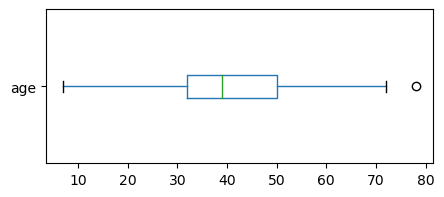

In [141]:
df.boxplot(column='age', fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [142]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

#IQR
IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

print('Q1:\n',Q1)
print('Q3:\n',Q3)
print('IQR:\n',IQR)
print('LB:\n',LB)
print('UB:\n',UB)

Q1:
 32.0
Q3:
 50.0
IQR:
 18.0
LB:
 5.0
UB:
 77.0


In [143]:
df[(df['age'] < LB) | (df['age'] > UB)]

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.0,32.0,4.0,NaN,1


In [176]:
1/len(df)*100

0.6451612903225806

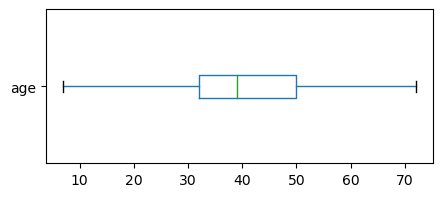

In [144]:
df.age[(df.age < LB) | (df.age > UB)] = np.median(df.age)
df.boxplot(column='age',fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

### bilirubin

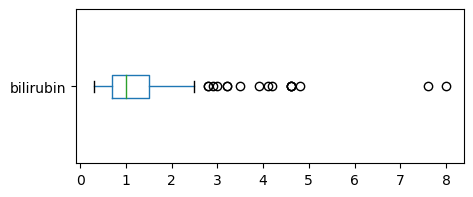

In [145]:
df.boxplot(column='bilirubin', fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [146]:
Q1 = df['bilirubin'].quantile(0.25)
Q3 = df['bilirubin'].quantile(0.75)

IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

print('Q1:\n',Q1)
print('Q3:\n',Q3)
print('IQR:\n',IQR)
print('LB:\n',LB)
print('UB:\n',UB)

Q1:
 0.7
Q3:
 1.5
IQR:
 0.8
LB:
 -0.5000000000000002
UB:
 2.7


In [147]:
df[(df['bilirubin'] < LB) | (df['bilirubin'] > UB)]

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
41,2,23,1,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,4.6,56.0,16.0,4.6,NaN,1
62,2,32,1,2,2,1,1,1,2,2,2,1,2,1,3.5,215.0,54.0,3.4,29.0,1
67,1,57,1,2,2,1,1,1,2,2,2,1,1,2,4.1,NaN,48.0,2.6,73.0,1
71,1,34,1,1,2,1,1,2,1,1,2,1,2,2,2.8,127.0,182.0,NaN,NaN,1
91,1,42,1,1,2,1,1,1,2,2,1,1,2,1,4.6,NaN,55.0,3.3,NaN,2
97,2,44,1,1,2,1,1,2,1,1,2,1,2,2,3.0,114.0,65.0,3.5,NaN,2
100,1,48,1,1,2,1,1,2,2,1,2,1,1,1,4.8,123.0,157.0,2.7,31.0,2
103,2,51,1,1,2,1,1,1,2,1,1,1,2,1,4.6,215.0,269.0,3.9,51.0,2
115,2,69,2,2,2,1,2,2,2,2,2,2,2,2,3.2,119.0,136.0,NaN,NaN,2
119,2,54,1,2,2,1,2,2,1,1,2,2,2,2,3.2,85.0,28.0,3.8,NaN,2


In [175]:
17/len(df)*100

10.967741935483872

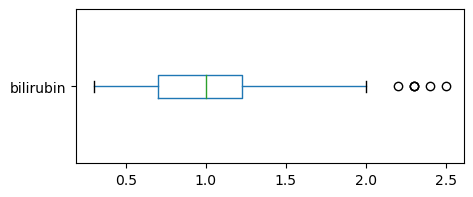

In [149]:
df.bilirubin[(df.bilirubin < LB) | (df.bilirubin > UB)] = np.median(df.bilirubin)
df.boxplot(column='bilirubin',fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

### alk_phosphate

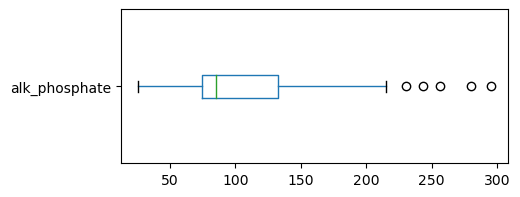

In [150]:
df.boxplot(column='alk_phosphate',fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [151]:
Q1 = df.alk_phosphate.quantile(0.25)
Q3 = df.alk_phosphate.quantile(0.75)

IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

print('Q1:',Q1)
print('Q3:',Q3)
print('IQR:',IQR)
print('LB:',LB)
print('UB:',UB)

Q1: 74.25
Q3: 132.25
IQR: 58.0
LB: -12.75
UB: 219.25


In [152]:
df[(df.alk_phosphate < LB) | (df.alk_phosphate > UB)] 

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
30,1,39,1,1,1,1,1,2,2,1,2,2,2,2,2.3,280.0,98.0,3.8,40.0,1
90,2,50,2,1,2,1,2,2,1,1,1,1,2,2,0.9,230.0,117.0,3.4,41.0,2
110,2,7,1,2,2,2,2,2,2,1,1,2,2,2,0.7,256.0,25.0,4.2,NaN,2
134,1,38,1,1,2,2,2,2,2,1,2,2,2,2,0.4,243.0,49.0,3.8,90.0,2
140,2,36,1,1,2,1,1,1,1,1,2,1,2,1,1.7,295.0,60.0,2.7,NaN,2


In [177]:
5/len(df)*100

3.225806451612903

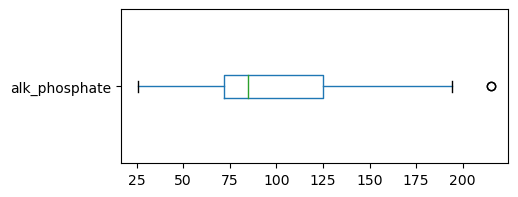

In [154]:
df.alk_phosphate[(df.alk_phosphate < LB) | (df.alk_phosphate > UB)] = np.median(df.alk_phosphate)
df.boxplot(column='alk_phosphate',fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

### sgot

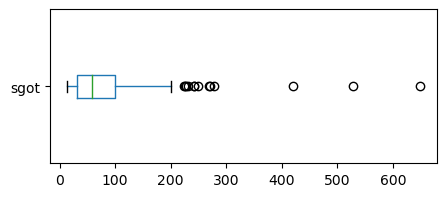

In [155]:
df.boxplot(column='sgot',fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [156]:
Q1 = df.sgot.quantile(0.25)
Q3 = df.sgot.quantile(0.75)

IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

print('Q1:',Q1)
print('Q3:',Q3)
print('IQR:',IQR)
print('LB:',LB)
print('UB:',UB)

Q1: 31.5
Q3: 100.5
IQR: 69.0
LB: -72.0
UB: 204.0


In [157]:
df[(df.sgot < LB) | (df.sgot > UB)] 

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
11,2,32,1,2,1,1,2,2,2,1,2,1,2,2,1.0,59.0,249.0,3.7,54.0,1
47,2,28,2,2,2,1,1,2,2,1,2,2,2,2,1.8,191.0,420.0,3.3,46.0,1
72,2,51,1,2,2,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0.9,76.0,271.0,4.4,NaN,1
76,1,58,1,2,2,1,2,2,1,1,1,1,2,2,2.0,167.0,242.0,3.3,NaN,1
81,2,36,1,2,2,2,2,2,2,2,2,2,2,2,0.7,62.0,224.0,4.2,100.0,1
102,2,27,1,1,2,1,2,2,2,1,2,2,2,2,2.4,168.0,227.0,3.0,66.0,2
103,2,51,1,1,2,1,1,1,2,1,1,1,2,1,NaN,215.0,269.0,3.9,51.0,2
107,2,45,1,1,2,1,1,1,2,2,2,2,2,2,2.3,NaN,648.0,NaN,NaN,2
108,2,54,1,1,1,2,2,2,1,1,2,2,2,2,1.0,155.0,225.0,3.6,67.0,2
123,2,37,1,1,2,1,2,2,2,2,2,1,2,2,0.9,NaN,231.0,4.3,NaN,2


In [178]:
13/len(df)*100

8.38709677419355

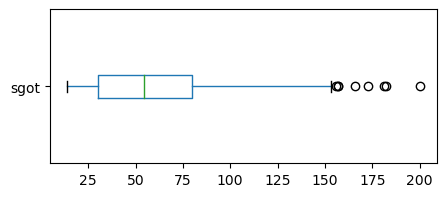

In [158]:
df.sgot[(df.sgot < LB) | (df.sgot > UB)] = np.median(df.sgot)
df.boxplot(column='sgot',fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

### albumin

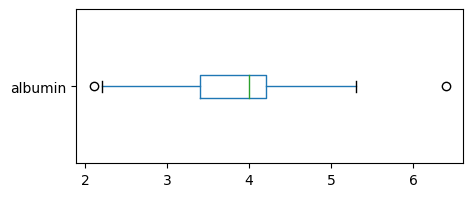

In [159]:
df.boxplot(column='albumin',fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [160]:
Q1 = df.albumin.quantile(0.25)
Q3 = df.albumin.quantile(0.75)

IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

print('Q1:',Q1)
print('Q3:',Q3)
print('IQR:',IQR)
print('LB:',LB)
print('UB:',UB)

Q1: 3.4
Q3: 4.2
IQR: 0.8000000000000003
LB: 2.1999999999999993
UB: 5.4


In [161]:
df[(df.albumin < LB) | (df.albumin > UB)]

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
104,1,47,1,2,2,1,1,2,2,1,2,2,1,1,1.7,86.0,20.0,2.1,46.0,2
105,2,25,1,2,2,2,2,2,2,2,2,2,2,2,0.6,NaN,34.0,6.4,NaN,2


In [179]:
2/len(df)*100

1.2903225806451613

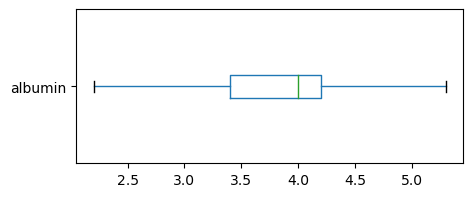

In [163]:
df.albumin[(df.albumin < LB) | (df.albumin > UB)] = np.median(df.albumin)
df.boxplot(column='albumin',fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

### protime

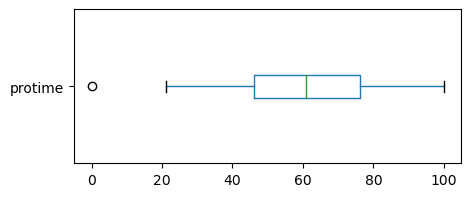

In [164]:
df.boxplot(column='protime',fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [165]:
Q1 = df.protime.quantile(0.25)
Q3 = df.protime.quantile(0.75)

IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

print('Q1:',Q1)
print('Q3:',Q3)
print('IQR:',IQR)
print('LB:',LB)
print('UB:',UB)

Q1: 46.0
Q3: 76.25
IQR: 30.25
LB: 0.625
UB: 121.625


In [166]:
df[(df.protime < LB) | (df.protime > UB)]

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
130,2,54,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85.0,30.0,4.5,0.0,2


In [180]:
1/len(df)*100

0.6451612903225806

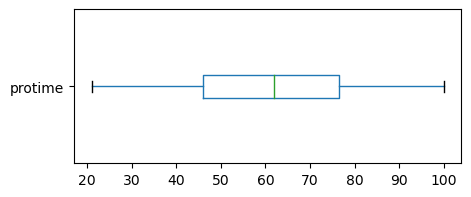

In [167]:
df.protime[(df.protime < LB) | (df.protime > UB)] = np.median(df.protime)
df.boxplot(column='protime',fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [168]:
df.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,132.000000,121.000000,138.000000,137.000000,87.000000
mean,40.948387,1.062879,98.900826,64.608696,3.810949,62.563218
std,12.209637,0.454394,41.125095,43.613504,0.599961,22.008297
min,7.000000,0.300000,26.000000,14.000000,2.200000,21.000000
25%,32.000000,0.700000,72.000000,30.250000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,54.500000,4.000000,62.000000
75%,50.000000,1.225000,125.000000,80.000000,4.200000,76.500000
max,72.000000,2.500000,215.000000,200.000000,5.300000,100.000000


In [169]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135.0,42.0,3.5,NaN,1
2,2,39,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2,2,2,2,2,2,2,2,2,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,NaN,200.0,4.0,NaN,1


In [170]:
df.alk_phosphate = df.alk_phosphate.round().astype(float)
df.sgot = df.sgot.round().astype(float)
df.protime = np.round(df.protime)
df.bilirubin = np.round(df.bilirubin,2)
df.albumin = np.round(df.albumin,2)

df.head(5)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135.0,42.0,3.5,NaN,1
2,2,39,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2,2,2,2,2,2,2,2,2,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,NaN,200.0,4.0,NaN,1


In [171]:
# saving the dataframe
df.to_csv('hepatitis2_outlier_iqr_median.csv', index=False)